In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

In [4]:
tot_gas_mass, tot_stellar_mass, Mtot, halo_num =  step.calculate_all('Mgas',
                                                                     'Mstar',
                                                                     'Mvir',
                                                                     'halo_number()')

In [5]:
f = open("stellar_metal.pkl", "rb")
stellar_metal_data = pickle.load(f)
f.close()

f = open("gas_metal.pkl", "rb")
gas_metal_data = pickle.load(f)
f.close()

In [6]:
stellar_metal_data

{'tot_stellar_mass': array([6.66834241e+11, 5.90462601e+11, 6.68739788e+11, ...,
        2.20286884e+06, 2.20575411e+06, 1.84847039e+06]),
 'tot_stellar_metal': array([0.02392187, 0.01987858, 0.02463648, ..., 0.00038928, 0.00025985,
        0.00030544]),
 'metal_star_solar': array([1.78521387, 1.4834759 , 1.83854302, ..., 0.02905108, 0.01939213,
        0.02279417]),
 'halo_number': array([   1,    2,    3, ..., 3988, 3990, 3991]),
 'notes': 'stellar mass and stellar metals for the final timestep'}

In [7]:
all_halo_numbers = stellar_metal_data['halo_number']
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.in1d(all_halo_numbers, halo_with_BH)
halo_no_BH_ind = np.in1d(all_halo_numbers, halo_with_BH, invert = True)

In [8]:
print(len(halo_with_BH))
print(len(all_halo_numbers))

929
3057


In [9]:
#new pickle file with data of halos with BHs
BH_stellar_metal = stellar_metal_data["tot_stellar_metal"]
BH_stellar_metal = BH_stellar_metal[BH_halo_ind]

BH_gas_metal = gas_metal_data["tot_gas_metal"]
BH_gas_metal = BH_gas_metal[BH_halo_ind]

BH_stellar_mass = stellar_metal_data['tot_stellar_mass']
BH_stellar_mass = BH_stellar_mass[BH_halo_ind]

BH_gas_mass = gas_metal_data['tot_gas_mass']
BH_gas_mass = BH_gas_mass[BH_halo_ind]

save_stellar_data = {'BH_stellar_mass': BH_stellar_mass,
                     'BH_stellar_metal' : BH_stellar_metal,
                     'BH_halo_ind' : BH_halo_ind,
                     'note': 'stellar mass and stellar metals of halos with BH'}

save_gas_data = {'BH_gas_mass' : BH_gas_mass,
                 'BH_gas_metal' : BH_gas_metal,
                 'BH_halo_ind' : BH_halo_ind,
                'note': 'gas mass and gas metals of halos with BH'}

f = open("stellar_metal_BH.pkl", "wb")
pickle.dump(save_stellar_data, f)
f.close()

f = open("gas_metal_BH.pkl", "wb")
pickle.dump(save_gas_data, f)
f.close()

f = open("stellar_metal_BH.pkl", "rb")
star_with_BH_data = pickle.load(f)
f.close()

f = open("gas_metal_BH.pkl", "rb")
gas_with_BH_data = pickle.load(f)
f.close()

In [10]:
plot_BH_stellar_mass = star_with_BH_data['BH_stellar_mass']
plot_BH_stellar_metal = star_with_BH_data['BH_stellar_metal']

plt_stellar_metal = np.array(stellar_metal_data['tot_stellar_metal'])
plt_stellar_metal = plt_stellar_metal[halo_no_BH_ind]
plt_stellar_mass = np.array(stellar_metal_data["tot_stellar_mass"])
plt_stellar_mass = plt_stellar_mass[halo_no_BH_ind]

c_stellar_mass = tot_stellar_mass/Mtot

#BH_star_Fe = stellar_Fe[BH_halo_ind]

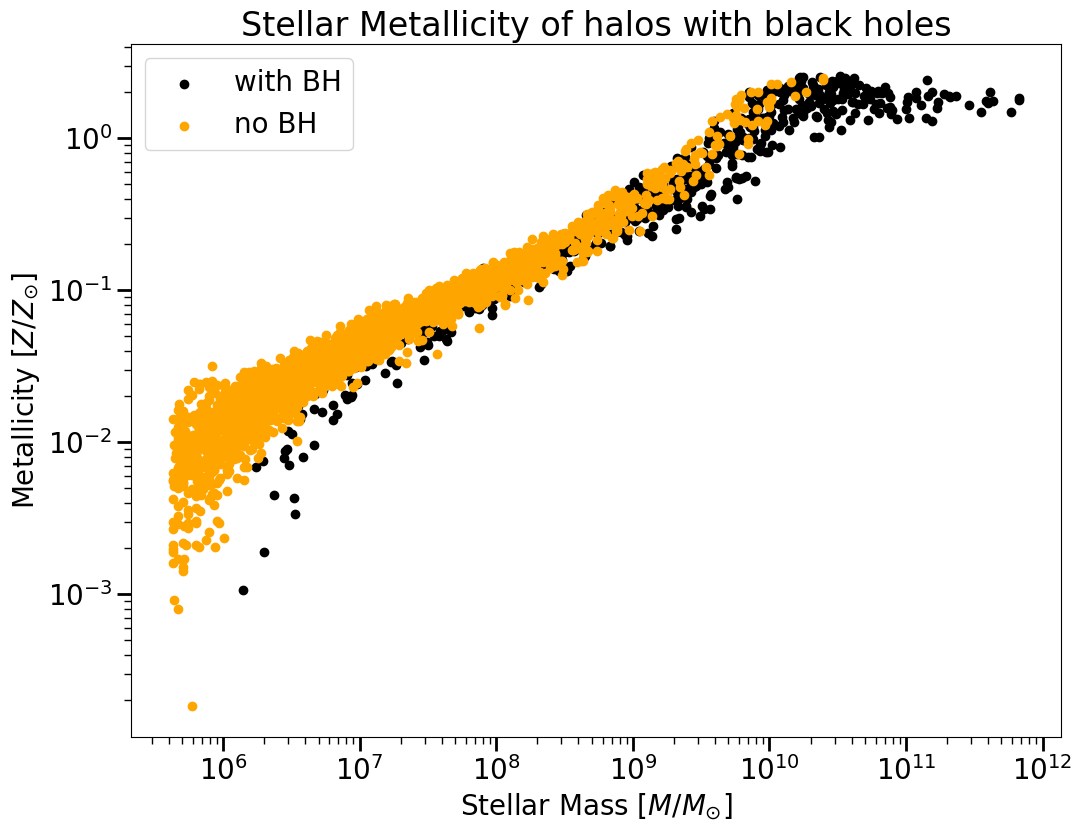

In [15]:
#plotting the stellar metals of halos with BHs
plt.scatter(plot_BH_stellar_mass, plot_BH_stellar_metal/solar_metal, color = "black", label = "with BH")
plt.scatter(plt_stellar_mass, plt_stellar_metal/solar_metal, label = 'no BH', color = 'orange')
#plt.scatter(plot_BH_stellar_mass, plot_BH_stellar_metal/solar_metal, color = "black", label = "with BH")


plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e6, 1e12])
#plt.ylim([1e-2, 1e1])

plt.title('Stellar Metallicity of halos with black holes')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log ratio of stellar mass to halo mass')

plt.legend()
plt.show()
#plt.savefig('stellar_metal_(BH).png')


In [12]:
plot_BH_gas_mass = gas_with_BH_data['BH_gas_mass']
plot_BH_gas_metal = gas_with_BH_data['BH_gas_metal']

plt_gas_metal = np.array(gas_metal_data['tot_gas_metal'])
plt_gas_metal = plt_gas_metal[halo_no_BH_ind]
plt_gas_mass = np.array(gas_metal_data["tot_gas_mass"])
plt_gas_mass = plt_gas_mass[halo_no_BH_ind]

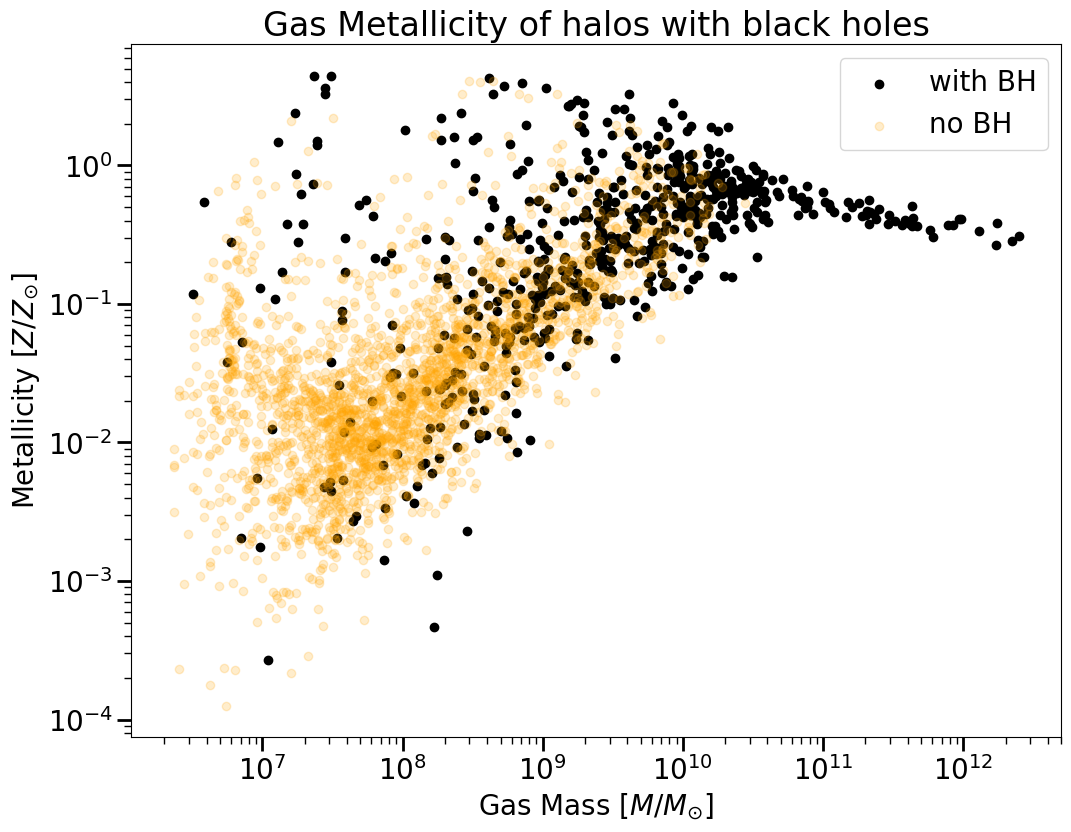

In [13]:
#plotting the stellar metals of halos with BHs
plt.scatter(plot_BH_gas_mass, plot_BH_gas_metal/solar_metal, color = "black", label = 'with BH')
plt.scatter(plt_gas_mass, plt_gas_metal/solar_metal, label = 'no BH', color = 'orange', alpha = 0.2)

plt.xscale('log')
plt.yscale('log')

plt.title('Gas Metallicity of halos with black holes')
plt.xlabel('Gas Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log ratio of stellar mass to halo mass')

plt.legend()
plt.show()
#plt.savefig('gas_metal_(BH).png')

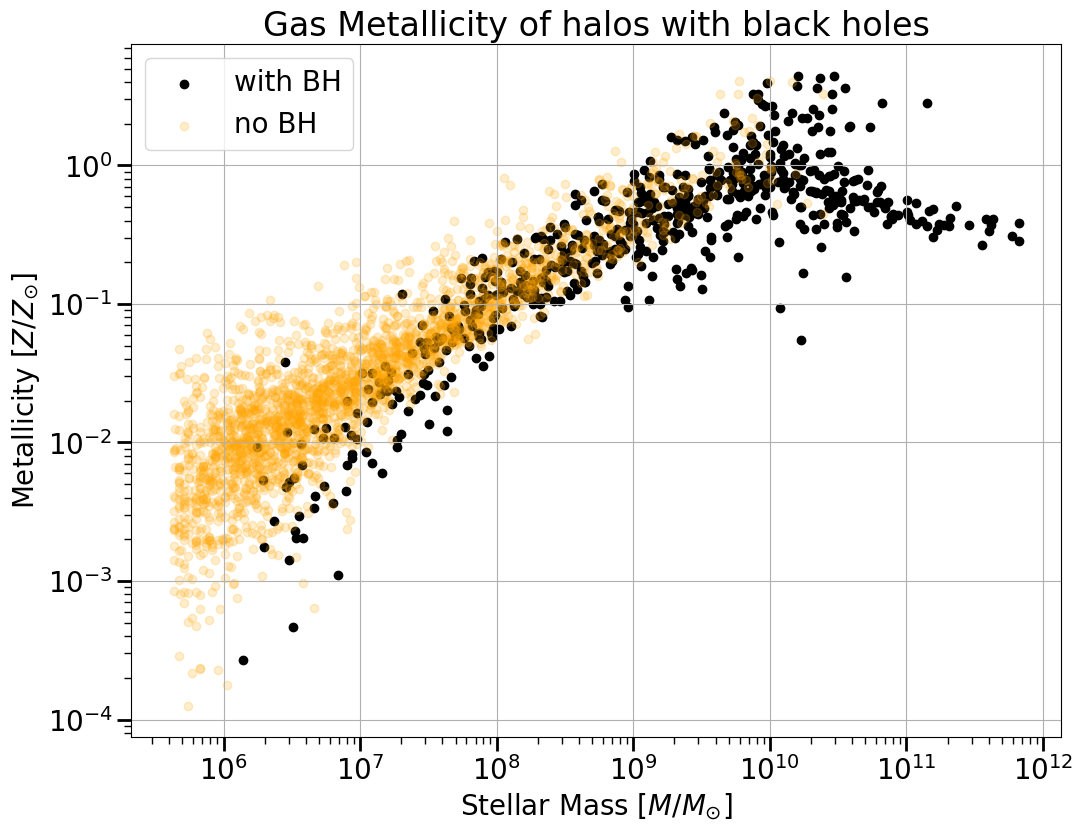

In [14]:
#plotting the stellar metals of halos with BHs
plt.scatter(plot_BH_stellar_mass, plot_BH_gas_metal/solar_metal, color = "black", label = 'with BH')
plt.scatter(plt_stellar_mass, plt_gas_metal/solar_metal, label = 'no BH', color = 'orange', alpha = 0.2)

plt.xscale('log')
plt.yscale('log')

plt.title('Gas Metallicity of halos with black holes')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
plt.grid()

plt.legend()
plt.show()
#plt.savefig('gas_metal_(BH).png')